# Import important Libraries

In [86]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# Importing data(Saved in Excel)

In [87]:
df=pd.read_excel(r"C:\Users\ASUS\Desktop\Linear Regression\Linear Regression.xlsx")
df.head(10)

,Hours,Score
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [88]:
df.shape

(25, 2)

In [89]:
df.columns

Index(['Hours', 'Score'], dtype='object')

# Data Cleaning: Handle NA values

In [90]:
df.isnull().sum()

Hours    0
Score    0
dtype: int64

So our data is having no null values

In [91]:
#Lets check , any relationship between both variable

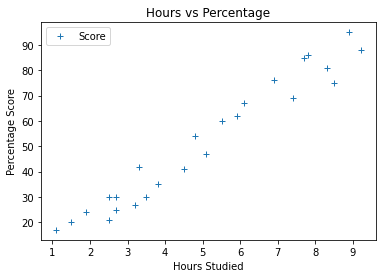

In [92]:
df.plot(x='Hours', y='Score', style='+')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [93]:
X = df.iloc[:, :-1].values       # Taking Coloumn "Hours" with all rows 
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [94]:
y = df.iloc[:,1].values       # Taking Coloumn "Scores" with all rows
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Splitting the data set

In [95]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Training of Data

In [96]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print ("Training of Train Data Set is Completed")

Training of Train Data Set is Completed


In [97]:
regressor.coef_

array([9.91065648])

In [98]:
regressor.intercept_

2.018160041434683

# Making Predictions

Y = m * X + b (m is coefficient and b is intercept)
Lets Predict Scores according to Hours spent=2.5

In [99]:
2.5*9.91065648+2.018160041434683

26.794801241434683

In [100]:
regressor.predict([[5.1]])

array([52.56250809])

In [101]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [102]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [103]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


# Predicting Scores with another given table of Hours

In [104]:
hours_new = pd.read_excel(r"C:\Users\ASUS\Desktop\Linear Regression\Hours.xlsx")
hours_new.head(10)

,Estimated Hours
0,3.5
1,4.5
2,5.5
3,6.5
4,7.5
5,8.5
6,9.0
7,10.0


In [105]:
p = regressor.predict(hours_new)
p

array([ 36.70545772,  46.6161142 ,  56.52677068,  66.43742717,
        76.34808365,  86.25874013,  91.21406837, 101.12472485])

In [106]:
hours_new["Predicted_Scores"]=p
hours_new

,Estimated Hours,Predicted_Scores
0,3.5,36.705458
1,4.5,46.616114
2,5.5,56.526771
3,6.5,66.437427
4,7.5,76.348084
5,8.5,86.258740
6,9.0,91.214068
7,10.0,101.124725


In [108]:
hours_new.to_excel("prediction.xlsx")